In [ ]:
!conda install -c intel scikit-learn

# Training a sentiment analysis classifier based on supervised machine learning algorithms

In [1]:
import string

import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
stop_words = set(stopwords.words('spanish'))

In [4]:
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

### Loading labeled tweets

In [5]:
# Dataset loaded from: https://docs.google.com/spreadsheets/d/11_E2ngsEOyTQwbwVVRHY5urzFF95BQCV/edit#gid=1788161364
tweets_df = pd.read_csv('./data/tweets_escenario1.2.csv', sep = ',')

In [6]:
tweets_df.shape

(627, 3)

In [7]:
tweets_df.head()

,full_text,sentiment,emotion
0,"@IvanDuque Sus socios de las AGC tienen este platanal vuelto mierda, pero no haces nada, usted inservible, ha logrado la peor inflación en Colombia y solo pública maricadas sin sentido, se robó las elecciones para entregar el país, valiente idiota tenemos de presidente.",negative,anger
1,@AlvaroUribeVel Ellos también celebran por que Maduro PetroGustavo Ivan Cepeda Timo Teodora Bobolivar entre muchos más sufren de insomnio.\nUribe Velez Alvarito no los deja dormir\nEl enemigo para las elecciones no es Fico.... Sino el Excelentísimo y más Grande Presidente que ha tenido Colombia,negative,anger
2,"@PDleh @cokycafe @PGN_COL En Colombia existen miles de leyes para controlar los funcionarios públicos pero a la hora de aplicarlas ""se les olvida que existen"". ¿Que más pruebas quieren? ¿Porque avalan unas elecciones, las del 13 de marzo, donde pado de todo lo que no debía de pasar? Escuchamos respuestas",negative,anger
3,Petro ahora es el Capitán América o mejor dicho el Capitán Colombia de ganar las elecciones. No soltara el escudo ni para dormir 😂 https://t.co/k56Dv7id1J,negative,joy
4,"#OtraPregunta \n""Petro promete reanudar relaciones diplomáticas con Maduro si gana elecciones en Colombia""...\nEsto no pinta nada bien... y si además gana Lula en Brasil...\n¿Esto como que va para largo? https://t.co/wpQsl5KoRe",negative,fear


In [8]:
tweets_df.sample(n=200, random_state=1)

,full_text,sentiment,emotion
301,"Se sabía. No van a dejar ganar legalmente al próximo presidente @FicoGutierrez , le van a robar las elecciones. Ya perdimos, se tomaron el poder definitivamente. \n\n#ElRiesgoEs #QuienRespondePor #Colombia #ColombiaDecide #RCN #PetroCorrupto @Salu_Macallan8 @ArgiroCasta888 https://t.co/T9obCGmyk9",negative,fear
135,"#ColombiaMiElección Bajo el lema: “¡Liberemos a Colombia de las maquinarias y la corrupción!”, la aspirante a la presidencia, Ingrid Betancourt, presentó las líneas estratégicas del plan de gobierno.\n\nhttps://t.co/j8H8rcwrmW",neutral,anger
581,@MonederoJC A @petrogustavo lo quieren asesinar porque será el ganador de las elecciones presidenciales en Colombia.,negative,anger
592,"#presidente duque y congresistas q aprobaron tumbar ley garantías🇨🇴durante elecciones, deben renunciar Ya! @PGN_COL @FiscaliaCol @DefensoriaCol @CGR_Colombia ojo cuanto dinero se va perder erario público,se robaron para politiquería....justicia ya, q renuncien ya! https://t.co/O7Y6YrxYVI",negative,anger
132,"@MartinSantosR Un día un traidor, se robó un plebiscito, ilegalmente implementó un FARCACUERDO el congreso lo avaló cómplice del robo pues sus representados dijeron No. Como pueblo dormido no protestamos de forma contundente, por eso hoy se quieren robar las Elecciones. Colombia libre de Petro",negative,anger
...,...,...,...
520,"Colombia, el país donde la izquierda por practicar su credo religioso le hace escándalo al presidente pero se roban la elecciones y todo tranquilo",negative,sadness
78,"En #QuímicaEnLaFórmula, la candidata Ingrid Betancourt contó qué tanto sabe de su fórmula, en el camino a la Presidencia de Colombia ⬇️ https://t.co/KTgkWN1G2H",neutral,joy
540,"Dime tus posturas políticas y te diré si podemos seguir siendo Amix. Para conocerlas, te invito a hacer el #MatchElectoral aquí: https://t.co/3V4sEAcK5R\n\nMi resultado es este. \n¿Quieres seguir siendo mi ami? 🥹 https://t.co/bFnq2ROy0u",neutral,fear
57,"@Danielacad3 FICO PRESIDENTE Y SIN TANTA VUELTA\nY Petro el candidato eterno, que alguien le haga un dibujito ya que le hemos dicho en repetidas ELECCIONES que Colombia NO lo quiere y el nada que entiende y pretende robarse las elecciones a fraude , amenazas , terror o comprando conciencias",negative,anger


In [9]:
df2 = tweets_df.sample(n=200).copy()
len(df2)

200

In [10]:
df2.to_csv('DatasetPrueba1.csv')

In [11]:
df2['sentiment'].value_counts(dropna = False, normalize = True)

negative    0.665
neutral     0.280
positive    0.055
Name: sentiment, dtype: float64

In [12]:
df2['emotion'].value_counts(dropna = False, normalize = True)

anger      0.33
sadness    0.25
fear       0.23
joy        0.19
Name: emotion, dtype: float64

### Leaving out unlabeled texts, this data is not useful for training or validating a supervised model

In [13]:
# Removing  unlabeled tweets
tweets_labeled_df = df2.loc[df2['sentiment'].notnull()]

In [14]:
tweets_labeled_df.shape

(200, 3)

In [15]:
tweets_unlabeled_df = df2.loc[df2['sentiment'].isnull()]

In [16]:
tweets_unlabeled_df.shape

(0, 3)

In [17]:
# Scenario 1: Working with all classes

# Scenario 2: Working only with positive and negative classes
# Removing neutral class
#tweets_labeled_df = tweets_labeled_df.loc[tweets_labeled_df['sentiment'].isin(['positive', 'negative'])]

# Scenario 3: Treating neutral as positive classes
#tweets_labeled_df['sentiment'] = tweets_labeled_df['sentiment'].replace({'neutral': 'positive'})

### Splitting train and test datasets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(tweets_labeled_df['full_text'], tweets_labeled_df['sentiment'], test_size = 0.2, stratify = tweets_labeled_df['sentiment'], random_state = 1)


In [19]:
X_train.shape

(160,)

In [20]:
pd.Series(y_train).value_counts(normalize = True)

negative    0.66250
neutral     0.28125
positive    0.05625
Name: sentiment, dtype: float64

In [21]:
X_test.shape

(40,)

In [22]:
pd.Series(y_test).value_counts(normalize = True)

negative    0.675
neutral     0.275
positive    0.050
Name: sentiment, dtype: float64

### Vectorizing texts

<table>
    <tbody>
        <tr>
            <td>
                <h4>Bag of Words</h4>
                <img src="./imgs/bow.png" style="width: 500px;">
            </td>
            <td>
                <h4>TF-IDF</h4>
                <img src="./imgs/tf-idf.png" style="width: 500px;">
            </td>
        </tr>
    </tbody>
</table>

In [23]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [24]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [25]:
X_bow = bow.fit_transform(X_train)

In [26]:
X_tfidf = tfidf.fit_transform(X_train)

### Training and evaluating a model using BOW

In [27]:
model = RandomForestClassifier()

In [28]:
model.fit(X_bow, y_train)

RandomForestClassifier()

In [29]:
y_train_bow_predict = model.predict(X_bow)
y_test_bow_predict = model.predict(bow.transform(X_test))

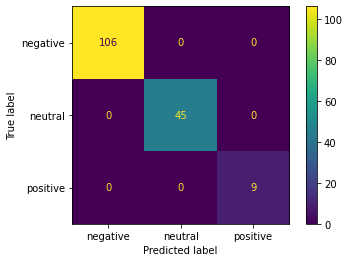

In [30]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

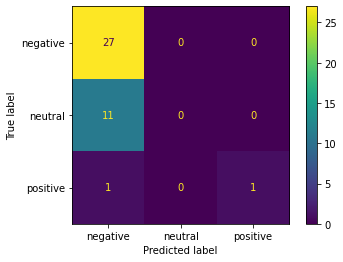

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [ ]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_test, y_test_bow_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_test, y_test_bow_predict, pos_label = 'positive'))
print('F1:', f1_score(y_test, y_test_bow_predict, pos_label = 'positive'))

In [32]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_test, y_test_bow_predict, average = None))
print('Recall:', recall_score(y_test, y_test_bow_predict, average = None))
print('F1:', f1_score(y_test, y_test_bow_predict, average = None))

Precision: [0.69230769 0.         1.        ]
Recall: [1.  0.  0.5]
F1: [0.81818182 0.         0.66666667]


C:\Users\Juan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Training and evaluating a model using TF-IDF

In [33]:
model = RandomForestClassifier()

In [34]:
model.fit(X_tfidf, y_train)

RandomForestClassifier()

In [35]:
y_train_tfidf_predict = model.predict(X_tfidf)
y_test_tfidf_predict = model.predict(bow.transform(X_test))

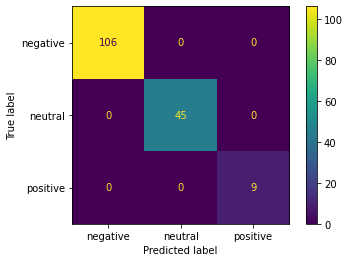

In [36]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

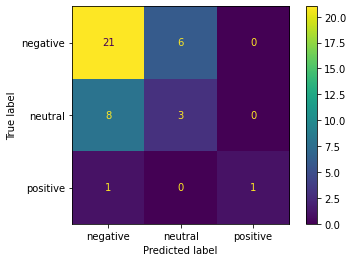

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [38]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_test, y_test_tfidf_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_test, y_test_tfidf_predict, pos_label = 'positive'))
print('F1:', f1_score(y_test, y_test_tfidf_predict, pos_label = 'positive'))

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [39]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_test, y_test_tfidf_predict, average = None))
print('Recall:', recall_score(y_test, y_test_tfidf_predict, average = None))
print('F1:', f1_score(y_test, y_test_tfidf_predict, average = None))

Precision: [0.7        0.33333333 1.        ]
Recall: [0.77777778 0.27272727 0.5       ]
F1: [0.73684211 0.3        0.66666667]


### How interpret the results?

<table>
    <tbody>
        <tr>
            <td>
                <img src="./imgs/confusion-matrix.png" style="height: 400px;">
            </td>
            <td>
                <img src="./imgs/precision-recall.png" style="height: 600px;">
            </td>
        </tr>
    </tbody>
</table>

### Analyzing errors

In [40]:
error_df = pd.concat(
    [ pd.concat([X_test, y_test ], axis = 1).reset_index(),
    pd.Series(y_test_bow_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

error_df.drop('index', inplace = True, axis = 1)

In [41]:
error_df.shape

(40, 3)

In [42]:
error_df.loc[error_df['actual'] != error_df['predicted']].head(100)

,full_text,actual,predicted
0,(Elecciones Colombia: ¿qué muestran las más recientes encuestas presidenciales?) publicado en https://t.co/XJ7xIbDAXM - https://t.co/kBmI6ABhaM https://t.co/Qp16PJZguR,neutral,negative
2,🇨🇴🗞️Junto a más de 30 organizaciones y colectivas defensoras de derechos humanos convocamos al primer debate feminista de cara a las elecciones presidenciales de Colombia del 29 de mayo de 2022.\n\n#EleccionesColombia2022 #HablemosDeLasElecciones2022 #EleccionesPresidenciales2022 https://t.co/B4sjlQ59aC,neutral,negative
8,¿Cuántos votos necesitaron Duque y Petro para ir a segunda vuelta en 2018?\nhttps://t.co/aS2FPlnbAU https://t.co/xddQRBZFYF,neutral,negative
9,Esta es la recopilación de los tarjetones de los últimos 28 años en el país. ¿Cuáles recuerda? \n\n#Elecciones2022 #ColombiaDecide \nhttps://t.co/7jcyCwQuni,neutral,negative
10,Colombia | Petro anuncia que si gana restablecerá las relaciones diplomáticas y consulares con Venezuela @InfoNodal https://t.co/X5FawyQTTi,neutral,negative
13,@CARLOSFMEJIA @infopresidencia @FiscaliaCol @PGN_COL @CNE_COLOMBIA Las elecciones a @SenadoGovCo SE DEBER REPETIR…,neutral,negative
14,🌍 INTERNACIONALES I Colombia: trayecto final de cara a las elecciones presidenciales | Política Hoy https://t.co/ppUlHfd7bj,neutral,negative
18,"En los consulados de Colombia en el exterior se adelantan las pruebas de funcionalidad para las elecciones de presidente y vicepresidente de la república. En el país, la Registraduría Nacional alista los simulacros para los comicios del 29 de mayo.\n\n#GarantesDeLaDemocracia https://t.co/7NOQaPod0z",neutral,negative
25,Me late que en estas elecciones las mujeres de Colombia somos las que vamos a poner Presidente 😍😍😍 #FicoPresidenteEnPrimeraVuelta https://t.co/Kb5EIULNlJ,positive,negative
31,¿Qué comunica Luis Pérez con su forma de vestir? En este nuevo capítulo de #ElHiloEE le contamos.\nhttps://t.co/BQkQzsnqUW\n\n#Elecciones2022 #ColombiaDecide https://t.co/wN9s5TcbbW,neutral,negative
